In [1]:
import numpy as np
import pandas as pd

In [7]:
data = pd.read_csv('Iris.csv')
data.drop(['species'], axis=1, inplace=True)
data.drop_duplicates(inplace=True)
data.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [24]:
class KNN:
    # predict the 4th feature based on other 3
    def __init__(self, k):
        self.k = k
    def fit(self, X, y):
        self.X = np.asarray(X)
        self.y = np.asarray(y)
    def predict(self, X):
        X = np.asarray(X)
        result = []
        for x in X:
            distance = np.sqrt(np.sum((x-self.X)**2, axis = 1))
            index = distance.argsort()
            index = index[:self.k]
            result.append(np.mean(self.y[index]))
        return np.asarray(result)
    def predict_update(self, X): # with weights (reciprocal/sum(reciprocal))
        X = np.asarray(X)
        result = []
        for x in X:
            distance = np.sqrt(np.sum((x-self.X)**2, axis = 1))
            index = distance.argsort()
            index = index[:self.k]
            s = np.sum(1/(distance[index]+0.001)) # sum(reciprocal), make denominator non-zero
            weight = (1/(distance[index]+0.001))/s
            result.append(np.sum(self.y[index]*weight)) # sum instead of mean
        return np.asarray(result)

In [28]:
t = data.sample(len(data), random_state = 0)
train_X = t.iloc[:120, :-1]
train_y = t.iloc[:120, -1]
test_X = t.iloc[120:, :-1]
test_y = t.iloc[120:, -1]
knn = KNN(3)
knn.fit(train_X, train_y)
result = knn.predict(test_X)
display(result)
display(test_y.values)
np.mean((result-test_y)**2) # MSE

array([1.33333333, 2.        , 1.2       , 1.26666667, 1.93333333,
       1.16666667, 2.16666667, 0.36666667, 1.9       , 1.4       ,
       1.2       , 0.16666667, 1.93333333, 2.26666667, 1.73333333,
       0.13333333, 1.03333333, 1.3       , 1.83333333, 1.23333333,
       0.16666667, 0.23333333, 0.16666667, 2.03333333, 1.2       ,
       1.8       , 0.2       ])

array([1.5, 1.8, 1. , 1.3, 2.1, 1.2, 2.2, 0.2, 2.3, 1.3, 1. , 0.2, 1.6,
       2.1, 2.3, 0.3, 1. , 1.2, 1.5, 1.3, 0.2, 0.4, 0.1, 2.1, 1.1, 1.5,
       0.2])

0.04185185185185184

In [27]:
result_update = knn.predict_update(test_X)
display(result_update)
np.mean((result_update-test_y)**2)

array([1.35403914, 2.04006363, 1.15554454, 1.26331758, 2.19561371,
       1.16336566, 2.12379092, 0.36949954, 1.8875467 , 1.38365514,
       1.20794491, 0.17165102, 1.97672615, 2.23590685, 1.6765125 ,
       0.13817472, 1.02222047, 1.3       , 1.85536796, 1.23015903,
       0.17293278, 0.24368835, 0.17098366, 2.01556952, 1.1879292 ,
       1.82278521, 0.2       ])

0.04581065558343608

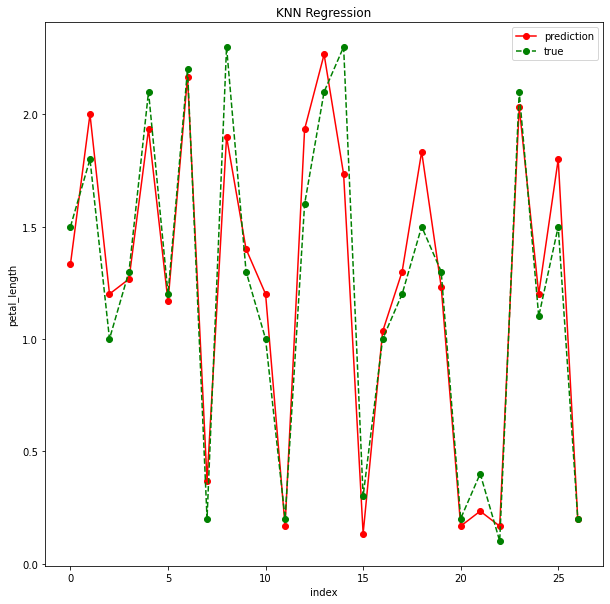

In [22]:
import matplotlib as mpl
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
plt.plot(result, 'ro-', label='prediction') # red, circle, straight line
plt.plot(test_y.values, 'go--', label='true') # green, circle, dash line
plt.title('KNN Regression')
plt.xlabel('index')
plt.ylabel('petal_length')
plt.legend()
plt.show()